## <font color='MAGENTA'>**CARGA DE DATOS**</font>

In [1]:
import os
#Acceder a documentos desde google drive
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Master DS/Machine Learning/TAREA/dataset')
os.getcwd()  
!ls

Mounted at /content/drive
datosPumpsLimpios.csv	     submissionsNBGAUSSIAN.csv	  testLimpios.csv
submissionsDecisionTree.csv  submissionsRandomForest.csv  train.csv
submissionsKNN.csv	     test.csv			  train_labels.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datosPumpsLimpios.csv') 
df.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,status_group
0,69572,1390.0,34.938093,-9.856322,5.0,109.0,1,0,1999.0,2011.0,...,1,0,0,0,1,0,0,0,0,functional
1,8776,1399.0,34.698766,-2.147466,2.0,280.0,1,1,2010.0,2013.0,...,0,0,1,0,1,0,0,0,0,functional
2,34310,686.0,37.460664,-3.821329,4.0,250.0,1,1,2009.0,2013.0,...,0,0,1,0,0,1,0,0,0,functional
3,67743,263.0,38.486161,-11.155298,63.0,58.0,1,1,1986.0,2013.0,...,0,0,0,0,0,1,0,0,0,non functional
4,19728,0.0,31.130847,-1.825359,1.0,150.0,1,1,2000.0,2011.0,...,0,0,1,0,1,0,0,0,0,functional


In [4]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values

## <font color='MAGENTA'>**ENTRENAMIENTO DEL MODELO**</font>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [6]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=None).fit(X_train, y_train)

In [7]:
ymodel = rfc.predict(X_test)
print('Train Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, ymodel))

Train Accuracy:  0.9978002244668911
Test Accuracy:  0.8036363636363636


In [8]:
cnf_matrix = confusion_matrix(y_test, ymodel)
np.set_printoptions(precision=2)

print(classification_report(y_test, ymodel))

                         precision    recall  f1-score   support

             functional       0.82      0.86      0.84      8008
functional needs repair       0.51      0.38      0.44      1062
         non functional       0.82      0.80      0.81      5780

               accuracy                           0.80     14850
              macro avg       0.72      0.68      0.70     14850
           weighted avg       0.80      0.80      0.80     14850



<font color='green'>**Análisis:** </font> 2 / 2

La precisión general del modelo es del 80%, lo que significa que el modelo clasifica correctamente el 80% de los puntos de datos. La precisión para cada una de las tres clases es la siguiente:

> Para la clase 'functional' la precisión es del 82%, lo que significa que el modelo clasifica correctamente el 82% de los puntos de datos de esta clase.

> Para la clase 'functional needs repair' la precisión es del 52%, lo que significa que el modelo clasifica correctamente el 52% de los puntos de datos de esta clase.

> Para la clase 'non functional' la precisión es del 83%, lo que significa que el modelo clasifica correctamente el 83% de los puntos de datos de esta clase.

En cuanto a la capacidad del modelo para recuperar todas las instancias relevantes, la medida de recall, se puede observar lo siguiente:

> Para la clase 'functional' el recall es del 87%, lo que significa que el modelo identifica correctamente el 87% de las instancias relevantes de esta clase.

> Para la clase 'functional needs repair' el recall es del 39%, lo que significa que el modelo identifica correctamente el 39% de las instancias relevantes de esta clase.

> Para la clase 'non functional' el recall es del 80%, lo que significa que el modelo identifica correctamente el 80% de las instancias relevantes de esta clase.

Por último, la medida F1 es una combinación de la precisión y el recall y se puede utilizar para evaluar el equilibrio entre ellos. En este caso, la medida F1 para cada clase es la siguiente:

> Para la clase 'functional' la medida F1 es del 84%, lo que indica un buen equilibrio entre la precisión y el recall para esta clase.

> Para la clase 'functional needs repair' la medida F1 es del 44%, lo que indica que hay un desequilibrio entre la precisión y el recall para esta clase.

> Para la clase 'non functional' la medida F1 es del 81%, lo que indica un buen equilibrio entre la precisión y el recall para esta clase.

## <font color='MAGENTA'>**MEJORANDO EL MODELO**</font>

In [9]:
rfc_params = {'n_estimators':[2,5,10,20, 25],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,None],
              'min_samples_split':[2,5,10]}


grid = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='accuracy').fit(X_train, y_train)

print('Mejores parámetros:', grid.best_params_)
print('Train Accuracy:', grid.score(X_train, y_train))
print('Test Accuracy:', grid.score(X_test, y_test))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 25}
Train Accuracy: 0.9467340067340068
Test Accuracy: 0.8049158249158249


In [10]:
print(classification_report(y_test, grid.predict(X_test)))

                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      8008
functional needs repair       0.58      0.36      0.44      1062
         non functional       0.82      0.79      0.81      5780

               accuracy                           0.80     14850
              macro avg       0.74      0.68      0.70     14850
           weighted avg       0.80      0.80      0.80     14850



<font color='green'>**Análisis:** </font>En cuanto al segundo resultado, se puede observar que hay un ligero aumento en la precisión y el recall para la etiqueta 'functional', mientras que hay una mejora considerable en la precisión para la etiqueta 'functional needs repair'. En particular, la precisión para esta etiqueta aumentó del 51% al 58%, lo que sugiere que el modelo está mejorando en la identificación de esta clase. Sin embargo, la sensibilidad o recall para esta etiqueta disminuyó del 38% al 36%. Para la etiqueta 'non functional', el modelo sigue teniendo una precisión del 82% y una sensibilidad del 79%. En general, los puntajes f1-score para todas las etiquetas son similares a los del primer resultado.

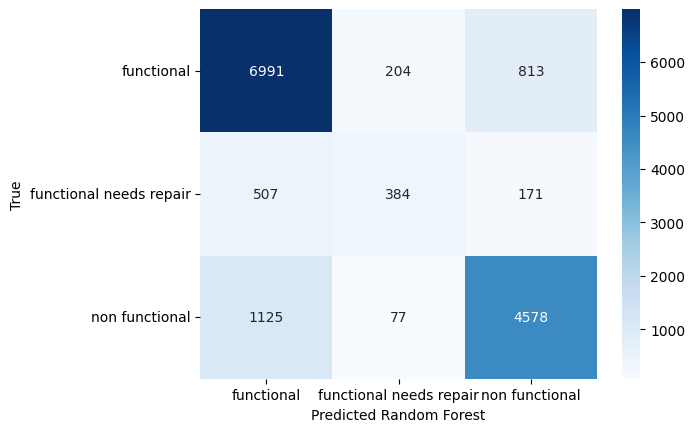

In [11]:
# Matriz de confusión
confusion = pd.DataFrame(confusion_matrix(y_test, grid.predict(X_test)))

# Etiquetas para el eje x e y
labels = np.unique(y_train)

# Crear el mapa de calor utilizando la función heatmap de Seaborn
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Configurar las etiquetas del eje x e y
plt.xlabel('Predicted Random Forest')
plt.ylabel('True')
plt.show()


<font color='green'>**Análisis:** </font>
* La clase functional: el modelo clasificó correctamente 6991 muestras como functional, pero también clasificó 214 muestras de esta clase como non functional y 803 muestras como functional needs repair.

* La clase non functional: el modelo clasificó correctamente 384 muestras como non functional, pero también clasificó 501 muestras de esta clase como functional y 177 muestras como functional needs repair.

* La clase functional needs repair: el modelo clasificó correctamente 4562 muestras como functional needs repair, pero también clasificó 1125 muestras de esta clase como functional y 93 muestras como non functional.

## <font color='MAGENTA'>**PROBANDO CON EL DATASET DE TEST**</font>

In [12]:
test = pd.read_csv('testLimpios.csv')
test.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_shallow well,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring
0,50785,1996.0,35.290799,-4.059696,3.0,321.0,1,1,2012.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
1,51630,1569.0,36.656709,-3.309214,2.0,300.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0
2,17168,1567.0,34.767863,-5.004344,2.0,500.0,1,1,2010.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
3,45559,267.0,38.058046,-9.418672,43.0,250.0,1,1,1987.0,2013.0,...,1,0,0,0,0,0,0,0,0,0
4,49871,1260.0,35.006123,-10.950412,3.0,60.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
X2 = test.drop(columns = ['id']).values
X2.shape

(14850, 97)

In [14]:
X.shape

(59400, 97)

In [15]:
y.shape

(59400,)

In [16]:
rfc = RandomForestClassifier(criterion='gini', 
                             max_depth=None,
                             min_samples_split = 10,
                             n_estimators= 20
                             ).fit(X, y)

In [17]:
y_pred = rfc.predict(X2)

In [18]:
ypredict = pd.DataFrame(y_pred)

In [19]:
ypredict.value_counts()

functional                 8841
non functional             5438
functional needs repair     571
dtype: int64

In [20]:
print(test.shape, ypredict.shape)

(14850, 98) (14850, 1)


In [21]:
submit = pd.concat((test['id'], ypredict), axis=1)

In [22]:
submit.columns = ['id', 'status_group']

In [23]:
submit.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [24]:
submit.to_csv('submissionsRandomForest.csv', index=False)